In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as mt
import numpy as np
from ipywidgets import interactive
from sklearn import neighbors, datasets

In [2]:
# task 1
df = pd.read_csv('wine.data')

In [3]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
14.23,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
1.71,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
2.43,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
15.6,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
127,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
2.8,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
3.06,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
.28,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
2.29,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


In [5]:
df.shape

(177, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [8]:
df.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [9]:
df.corr()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
14.23,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
1.71,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
2.43,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
15.6,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
127,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
2.8,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
3.06,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
.28,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
2.29,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


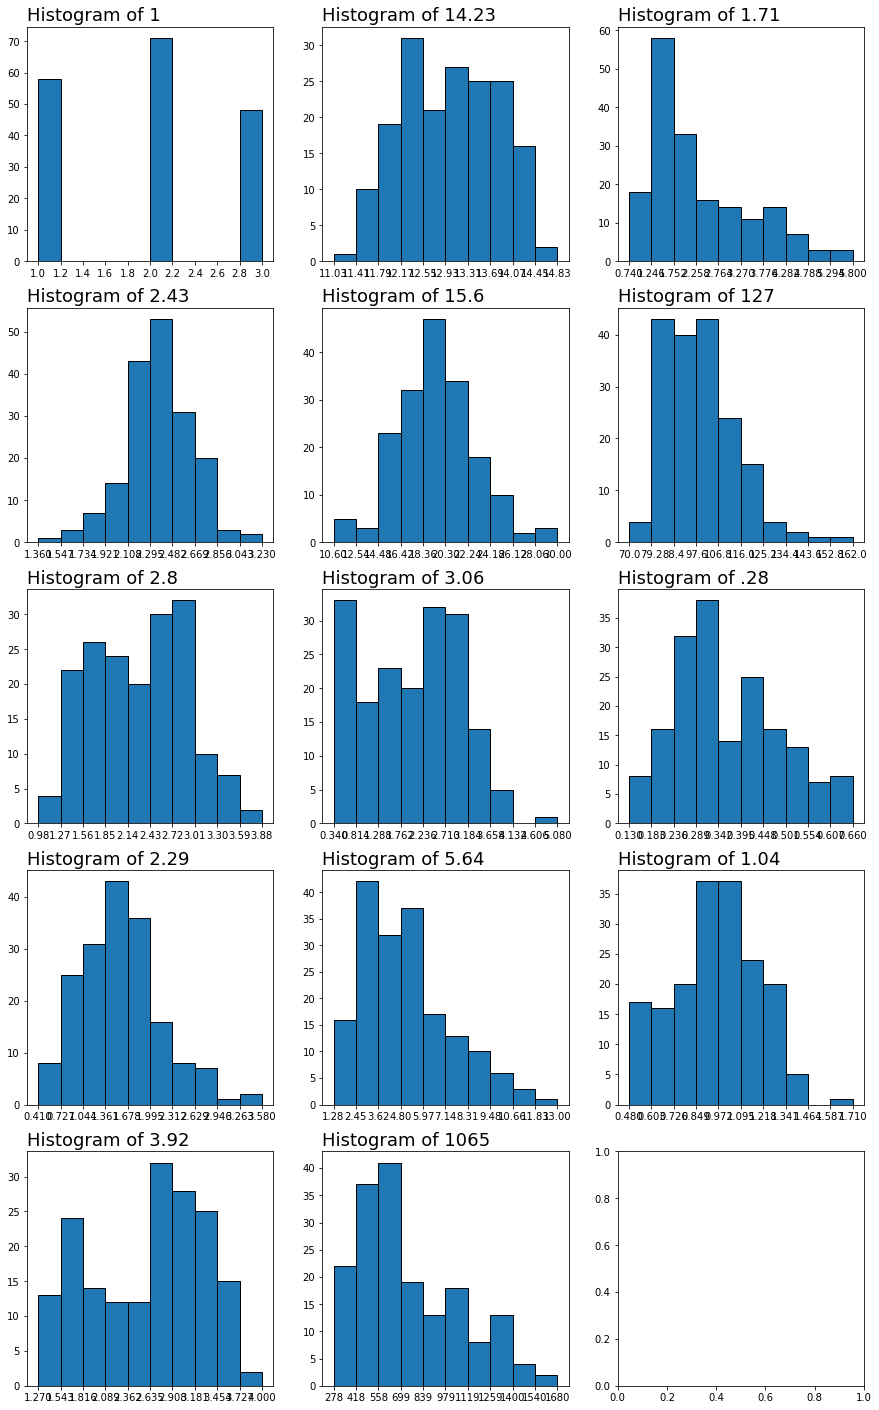

In [10]:
fig, ax = plt.subplots(5, 3, figsize= (15, 25))
for i, j in zip(df.columns, ax.flatten()):
    n, bins, patches = j.hist(df[i] ,  edgecolor = 'black')
    j.set_xticks(bins)
    j.set_title(f'Histogram of {i}', loc = 'left', fontsize = 18)

In [11]:
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]) , columns = df.iloc[:,1:].columns)

In [12]:
y = df[df.columns[0]]
x = dfs

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, train_size = 0.8)

In [15]:
for i in [xtrain, xtest, ytrain, ytest]:
    print(i.shape)

(141, 13)
(36, 13)
(141,)
(36,)


In [16]:
# task 2

knn = KNeighborsClassifier()

In [17]:
knn.fit(xtrain , ytrain)

KNeighborsClassifier()

In [18]:
knn.score(xtrain , ytrain)

0.9858156028368794

In [19]:
ypred = knn.predict(xtest)

In [20]:
mt.accuracy_score(ytest , ypred)

0.9166666666666666

In [21]:
# task 3

error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain , ytrain)
    nypred = knn.predict(xtest)
    error.append(np.mean(nypred != ytest))

In [22]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xtrain , ytrain)
knn.score(xtest, ytest)
ypred = knn.predict(xtest)
mt.accuracy_score(ytest, ypred)

0.9444444444444444

In [23]:
dfn = pd.DataFrame({'Actual':ytest.tolist(),'Predicted':list(ypred)})
dfn

,Actual,Predicted
0,1,1
1,1,1
2,3,3
3,1,1
4,2,2
5,1,1
6,2,2
7,3,3
8,2,2
9,3,3


In [24]:
def knn(k):
    wine = datasets.load_wine()
    
    # the data
    X = wine.data[:, 0:2]
    y = wine.target
    
    # learning the classifier
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)
    
    # Plot the decision boundary. Predict on a mesh
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # create a contour plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)
    
    # Plot also the training points
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])

In [25]:
interactive_plot = interactive(knn, k=(1, 20, 1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=10, description='k', max=20, min=1), Output()), _dom_classes=('widget-in…